## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: Martin
- Apellido: Aiscar
- Legajo: 163548-7

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
diabetes = pd.read_csv(r'C:\Users\marti\Data Science\tp01\ClusterAI_TP_dataset_diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
diabetes.shape

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [4]:
# PISTA: con una sola línea de código podríamos obtener toda esta información

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

In [5]:
diabetes['Outcome'].value_counts(normalize=True, dropna=False)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [6]:
#Metricas estadisticas de todas las variables numericas

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.03, 'Pairplot')

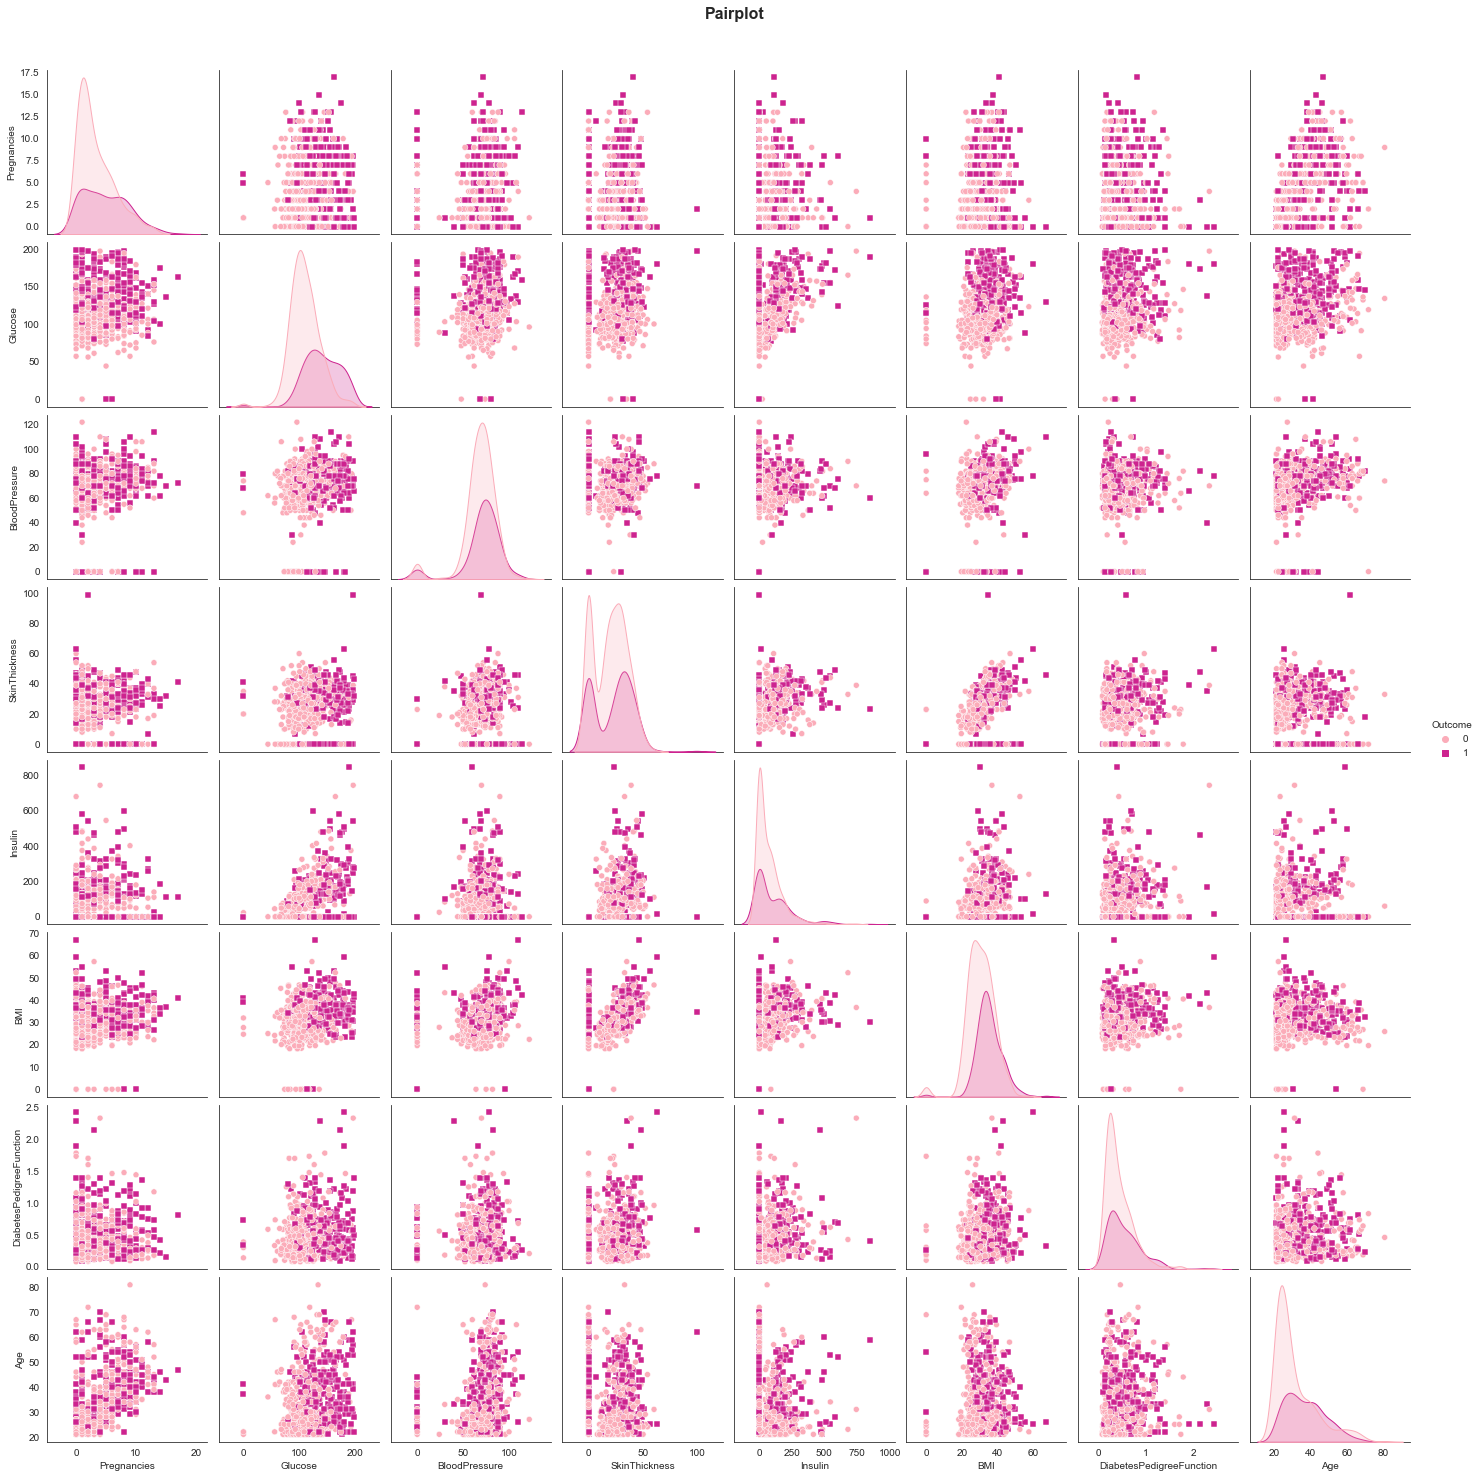

In [7]:
# Seteo de Tema

sns.set_style('white')

# Creo el pairplot
pairplot = sns.pairplot(diabetes, hue = 'Outcome', palette = 'RdPu', markers=["o", "s"])

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', 
                      fontfamily = 'sans-serif')

Por lo que se puede observar con este pairplot, existe una mayor cantidad de pacientes que tiene diabetes que aquellas que no tienen. Esto se puede ver en la diagonal de la matriz, donde se encuentran las diferentes funciones de densidad de cada una de las variables del dataframe, que todas la funciones de densidad pertenencientes a pacientes sin diabetes se encuentran por encima de las funciones pertenecientes a pacientes con diabetes.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [8]:
diabetes_corr=diabetes.corr()
diabetes_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


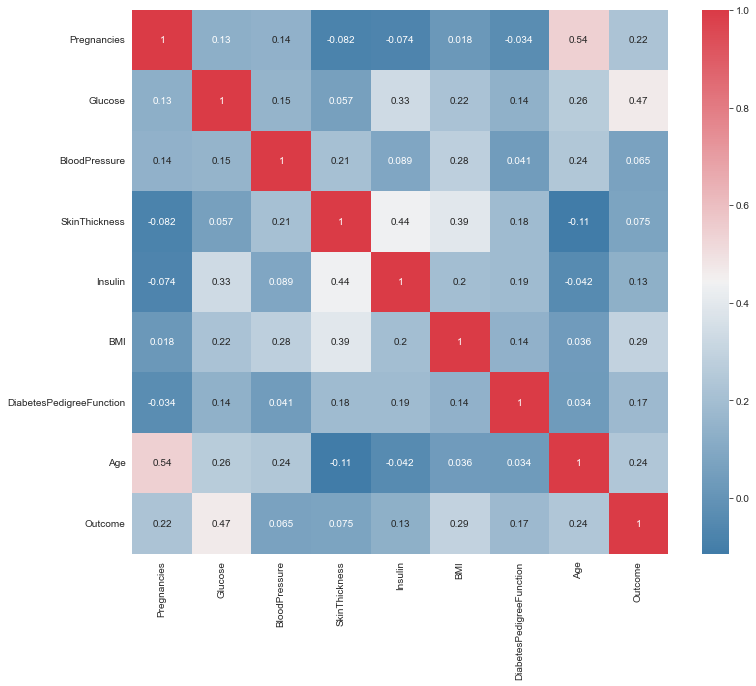

In [9]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(diabetes_corr, 
                 annot=True, 
                 cmap=sns.diverging_palette(240,10, as_cmap=True))

1) Los dos pares de variables mas correlacionadas son la edad de las pacientes con la cantidad de embarazos, y el nivel de glucosa en sangre con el resultado del test.

2) Ambos pares de variables poseen un tipo de correlacion lineal positiva, es decir, cuando una de las variables aumente, la otra lo hara de manera proporcional al coeficiente de pearson. El valor de correlacion del primer par es de 0.544341 mientras que el valor del segundo par es de 0.466581.

3) En relacion al primer par, la relacion entre ambas variables no tiene ninguna incidencia en el analisis de este modelo. Mientras que el segundo par si lo es, debido a que nos dice que un alto nivel de glucosa en sangre, es un indicio de que el paciente sea diabetico.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

Text(0.5, 1.0, 'Histograma de frecuencia')

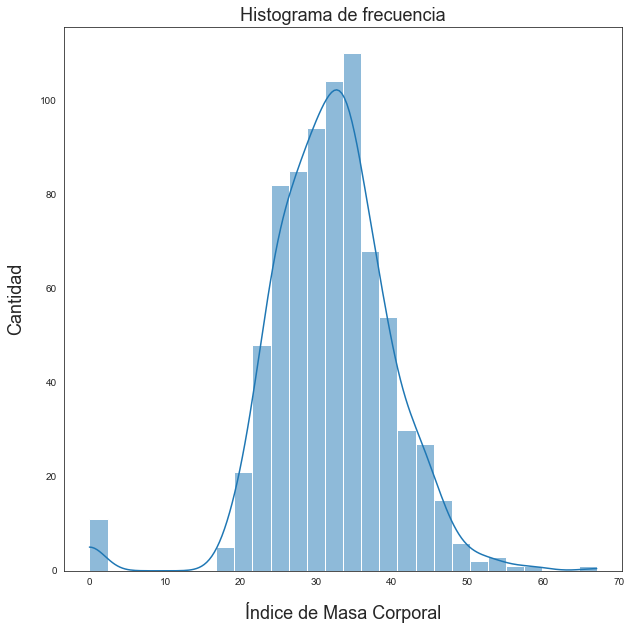

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=diabetes, bins=28, x='BMI', stat='count', edgecolor=None, kde=True)
plt.xlabel("Índice de Masa Corporal", size="18",labelpad=15)
plt.ylabel("Cantidad", size=18,labelpad=15)
ax.set_title('Histograma de frecuencia',size="18")

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

En este histograma, se puede observar que existen valores que se encuentra por fuera de la mayor concentración de datos recolectados, los cuales se encuentran entre 0 y 2.5. Esto se puede ver en el siguiente Boxplot:

Text(0.5, 0, 'Índice de Masa Corporal')

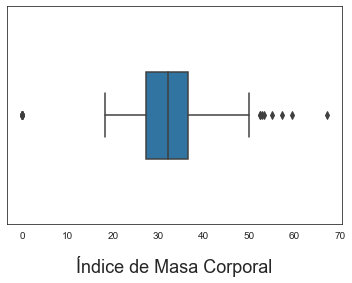

In [11]:
sns.boxplot(data=diabetes,x='BMI', width=0.4)
plt.xlabel("Índice de Masa Corporal", size="18",labelpad=15)

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

Text(0.5, 0, 'Índice de Masa Corporal')

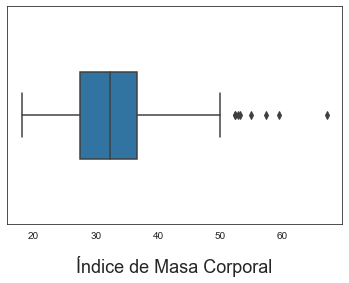

In [12]:
bmi_outliers=diabetes.loc[diabetes['BMI']>=10]
sns.boxplot(data=bmi_outliers,x='BMI',width=0.4)
plt.xlabel("Índice de Masa Corporal", size="18",labelpad=15)

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

Text(0, 0.5, 'Glucosa')

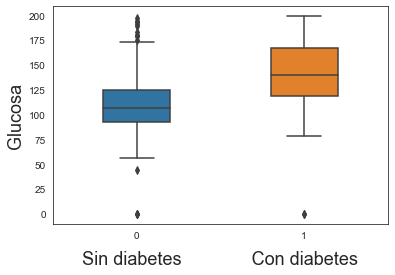

In [13]:
diabeticos=diabetes.loc[diabetes['Outcome']==1]
nodiabeticos=diabetes.loc[diabetes['Outcome']==0]

sns.boxplot(data=diabetes, x='Outcome',y='Glucose',width=0.4)
plt.xlabel('Sin diabetes              Con diabetes',labelpad=10,size=18)
plt.ylabel('Glucosa',size=18)

En este bloxplot, se puede ver como el nivel de glucosa en sangre es mucho mayor en paciente que tienen diabetes respecto a los que no, debido a que la mayor concentracion de los datos sobre el nivel de glucosa en sangre en pacientes diabeticos se encuentran entre 119 y 167, mientras que la mayor concentracion de los datos sobre el nivel de glucosa en sangre en pacientes no diabeticos se encuentran entre 93 y 125. Esto confirma la correlacion lineal positiva entre la diabetes y el nivel de glucosa en sangre.

In [14]:
# Metricas estadisticas del nivel de glucosa en sangre en paciente diabeticos
diabeticos['Glucose'].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

In [15]:
# Metricas estadisticas del nivel de glucosa en sangre en paciente no diabeticos
nodiabeticos['Glucose'].describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

Text(0, 0.5, 'Presion Sanguinea')

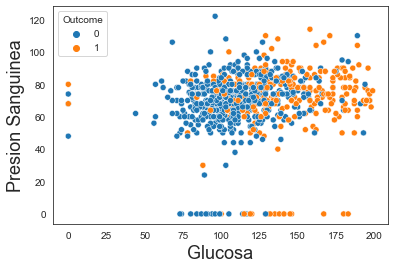

In [16]:
sns.scatterplot(data=diabetes, x="Glucose", y="BloodPressure", hue="Outcome")
plt.xlabel('Glucosa', size=18)
plt.ylabel('Presion Sanguinea', size=18)

A simple vista, no se puede observar alguna relacion entre el nivel de glucosa en sangre y la presion sanguinea en las pacientes tanto diabeticas como no diabeticas. Sin embargo, se puede mencionar que existe una concentracion de datos en un determinado rango de valores de presion sanguinea, donde se pueden diferenciar a las pacientes diabeticas y no diabeticos por su nivel de glucosa en sangre.

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [17]:
list_bandas = [0,30,40]

for i, i_banda in enumerate(list_bandas,start=1):
    if i < len(list_bandas):
        banda_i = list_bandas[i-1]
        banda_f = list_bandas[i]
        print(f"Enumerate --> i= {i}, banda_i= {banda_i}, banda_f= {banda_f}")
        diabetes.loc[(diabetes['Age'] > banda_i) & (diabetes['Age'] <= banda_f), 'Banda']   = i
    else:
        banda_f = i_banda
        print(f"Enumerate --> i= {i}, banda_f= {banda_f}")
        diabetes.loc[(diabetes['Age'] > banda_f), 'Banda']  = i

Enumerate --> i= 1, banda_i= 0, banda_f= 30
Enumerate --> i= 2, banda_i= 30, banda_f= 40
Enumerate --> i= 3, banda_f= 40


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

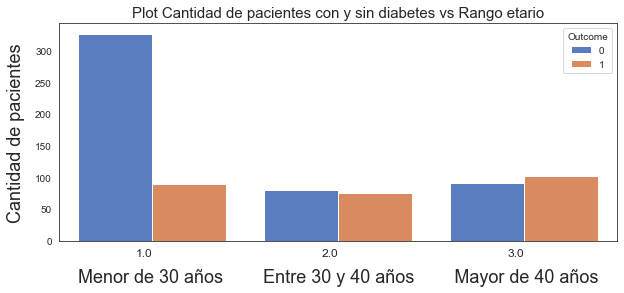

In [18]:
plt.figure(figsize=(10,4))
g = sns.countplot(x='Banda',data=diabetes, palette = "muted",hue='Outcome')
g.set_xticklabels(g.get_xticklabels(), size=12, ha="right")
plt.title('Plot Cantidad de pacientes con y sin diabetes vs Rango etario',size = 15)
plt.xlabel('Menor de 30 años        Entre 30 y 40 años        Mayor de 40 años',size = 18, labelpad=10)
plt.ylabel("Cantidad de pacientes",size = 18, labelpad=10)
plt.show()

En este countplot, se puede observar que las pacientes con menos de 30 años son menos propensas a contraer diabetes. Mientras que en los demas rangos etarios, se puede ver como la cantidad de pacientes con y sin diabetes es bastante similar, resaltando que existe una cantidad ligeramente superior de pacientes mayores de 40 años que tienen diabetes.